In [1]:
#웹 스크래핑 가능 유무 확인을 위한 모듈 탑재
import requests

#웹 스크래핑 대상 주소 저장
url = 'https://finance.naver.com/item/sise_day.naver?code=086520&page=2'

#HTTP 요청을 대상 주소로 보내고, HTTP 응답 받아서 저장하기
page = requests.get(url)

#응답 내용 확인하기
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [2]:
#헤더 정보 설정하기
my_headers = {'user-agent' : 'Mozilla/5.0'}

#요청 헤더 설정하여 HTTP 응답 받아오기
page = requests.get(url, headers=my_headers)

#응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230519195543/css/world.css">
</head>
<body>
<script language="JavaS

In [3]:
#판다스 라이브러리 탑재
import pandas as pd

#HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

#추출한 데이터 타입 확인하기
type(pages)

list

In [4]:
#페이지 개수 확인하기
len(pages)

2

In [5]:
#첫번째 테이블 내용 확인하기
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.11,550000.0,40000.0,604000.0,622000.0,544000.0,1790181.0
2,2023.05.10,590000.0,33000.0,623000.0,629000.0,589000.0,993112.0
3,2023.05.09,623000.0,15000.0,631000.0,643000.0,600000.0,1305194.0
4,2023.05.08,638000.0,45000.0,694000.0,696000.0,633000.0,855098.0
5,2023.05.04,683000.0,14000.0,668000.0,703000.0,650000.0,1273764.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.03,669000.0,64000.0,725000.0,729000.0,665000.0,1378398.0


In [6]:
#두번째 테이블 내용 확인하기
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [7]:
#페이지 번호를 제외한 주소 저장
new_url = 'https://finance.naver.com/item/sise_day.naver?code=086520&page='

#데이터를 축적할 데이터프레임 생성
all_tables = pd.DataFrame()

In [8]:
#페이지 번호 증가용 반복문
for page_number in range(1, 2):
    
    #페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    #주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    #HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)
    #테이블 추출
    table = pd.read_html(page.text)[0]
    
    #수행할 내용 확인
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    #데이터 축적용 데이터프레임 테이블 추가
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=1)
전체 0 줄에 15 줄 추가


In [9]:
#전체 테이블 결과 확인
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.25,547000.0,20000.0,558000.0,570000.0,545000.0,466587.0
2,2023.05.24,567000.0,3000.0,579000.0,581000.0,561000.0,418146.0
3,2023.05.23,570000.0,3000.0,571000.0,593000.0,566000.0,755810.0
4,2023.05.22,567000.0,35000.0,525000.0,568000.0,514000.0,835878.0
5,2023.05.19,532000.0,33000.0,562000.0,564000.0,531000.0,790223.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.18,565000.0,3000.0,580000.0,589000.0,558000.0,609522.0


In [10]:
#결손치 제거
all_tables.dropna(inplace=True)

#데이터 확인하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.25,547000.0,20000.0,558000.0,570000.0,545000.0,466587.0
2,2023.05.24,567000.0,3000.0,579000.0,581000.0,561000.0,418146.0
3,2023.05.23,570000.0,3000.0,571000.0,593000.0,566000.0,755810.0
4,2023.05.22,567000.0,35000.0,525000.0,568000.0,514000.0,835878.0
5,2023.05.19,532000.0,33000.0,562000.0,564000.0,531000.0,790223.0
9,2023.05.18,565000.0,3000.0,580000.0,589000.0,558000.0,609522.0
10,2023.05.17,568000.0,17000.0,541000.0,579000.0,537000.0,795914.0
11,2023.05.16,551000.0,30000.0,533000.0,561000.0,522000.0,1462272.0
12,2023.05.15,521000.0,23000.0,536000.0,539000.0,499000.0,1672607.0
13,2023.05.12,544000.0,6000.0,537000.0,560000.0,530000.0,1388136.0


In [11]:
#페이지 번호 증가용 반복문
for page_number in range(1, 11): #range(1,11) -> 10페이지 데이터 수집
    
    #페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    #주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    #HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)
    #테이블 추출
    table = pd.read_html(page.text)[0]
    
    #수행할 내용 확인
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    #데이터 축적용 데이터프레임 테이블 추가
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=1)
전체 10 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=2)
전체 25 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=3)
전체 40 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=4)
전체 55 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=5)
전체 70 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=6)
전체 85 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=7)
전체 100 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=8)
전체 115 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=9)
전체 130 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=086520&page=10)
전체 145 줄에 15 줄 추가


In [12]:
all_tables.dropna(inplace=True)
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.25,547000.0,20000.0,558000.0,570000.0,545000.0,466587.0
2,2023.05.24,567000.0,3000.0,579000.0,581000.0,561000.0,418146.0
3,2023.05.23,570000.0,3000.0,571000.0,593000.0,566000.0,755810.0
4,2023.05.22,567000.0,35000.0,525000.0,568000.0,514000.0,835878.0
5,2023.05.19,532000.0,33000.0,562000.0,564000.0,531000.0,790223.0
...,...,...,...,...,...,...,...
9,2023.01.05,110300.0,3700.0,115200.0,115900.0,110100.0,301003.0
10,2023.01.04,114000.0,0.0,111100.0,114600.0,110800.0,288851.0
11,2023.01.03,114000.0,4000.0,109500.0,114100.0,108500.0,415425.0
12,2023.01.02,110000.0,7000.0,106000.0,111000.0,105600.0,465719.0


In [13]:
#열 이름 영문으로 변경
all_tables.rename(columns={'날짜' : 'date',
                           '종가' : 'end_price',
                           '시가' : 'start_price',
                           '고가' : 'highest_price',
                           '저가' : 'lowest_price'}
                 , inplace=True)
#데이터 확인하기
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.05.25,547000.0,20000.0,558000.0,570000.0,545000.0,466587.0
2,2023.05.24,567000.0,3000.0,579000.0,581000.0,561000.0,418146.0
3,2023.05.23,570000.0,3000.0,571000.0,593000.0,566000.0,755810.0
4,2023.05.22,567000.0,35000.0,525000.0,568000.0,514000.0,835878.0
5,2023.05.19,532000.0,33000.0,562000.0,564000.0,531000.0,790223.0
...,...,...,...,...,...,...,...
9,2023.01.05,110300.0,3700.0,115200.0,115900.0,110100.0,301003.0
10,2023.01.04,114000.0,0.0,111100.0,114600.0,110800.0,288851.0
11,2023.01.03,114000.0,4000.0,109500.0,114100.0,108500.0,415425.0
12,2023.01.02,110000.0,7000.0,106000.0,111000.0,105600.0,465719.0


In [14]:
#필요 없는 열 제거
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)

#데이터 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.05.25,547000.0,558000.0,570000.0,545000.0
2,2023.05.24,567000.0,579000.0,581000.0,561000.0
3,2023.05.23,570000.0,571000.0,593000.0,566000.0
4,2023.05.22,567000.0,525000.0,568000.0,514000.0
5,2023.05.19,532000.0,562000.0,564000.0,531000.0
...,...,...,...,...,...
9,2023.01.05,110300.0,115200.0,115900.0,110100.0
10,2023.01.04,114000.0,111100.0,114600.0,110800.0
11,2023.01.03,114000.0,109500.0,114100.0,108500.0
12,2023.01.02,110000.0,106000.0,111000.0,105600.0


In [40]:
#중앙값 열 추가
all_tables['midian_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] 
                                    - all_tables['lowest_price']) / 2)

all_tables

,end_price,전일비,start_price,highest_price,lowest_price,거래량,midian_price,month
date,,,,,,,,
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
...,...,...,...,...,...,...,...,...
2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0,2023.05
2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0,2023.05
2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0,2023.05


In [ ]:
#월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

all_tables

In [ ]:
#날짜를 색인으로 지정하기
all_tables.set_index('month', inplace=True)

#날짜 오른차순으로 정렬하기
all_tables.sort_index(inplace=True)

#값 확인하기
all_tables

In [ ]:
#전체 숫자 데이터 선 그래프 그리기
all_tables.plot.line()

In [16]:
#앞 15일치데이터 선 그래프로 그리기
all_tables[:15].plot.line(rot=45)

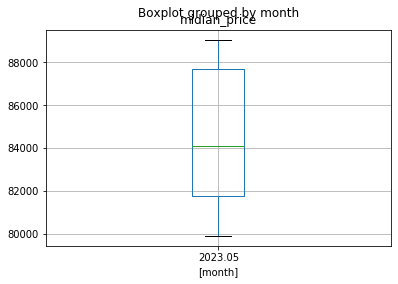

In [36]:
#일일 시세 중앙값의 상자 수염 그래프 그리기
all_tables.boxplot(column=['midian_price'], by=['month'])

In [ ]:
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=361610&page=2'

page = requests.get(url)

print(page.text)

In [ ]:
my_headers = {'user-agent' : 'Mozilla/5.0'}

page = requests.get(url, headers=my_headers)

print(page.text)

In [18]:
import pandas as pd

pages = pd.read_html(page.text)

type(pages)

list

In [19]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.01.12,116000.0,500.0,117800.0,117900.0,115200.0,282513.0
2,2023.01.11,116500.0,7400.0,110100.0,116500.0,109900.0,531723.0
3,2023.01.10,109100.0,1500.0,111100.0,112900.0,109000.0,380363.0
4,2023.01.09,110600.0,1000.0,111900.0,112100.0,109600.0,314971.0
5,2023.01.06,109600.0,700.0,109200.0,112000.0,108400.0,291765.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.01.05,110300.0,3700.0,115200.0,115900.0,110100.0,301003.0


In [20]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [21]:
new_url = 'https://finance.naver.com/item/sise_day.naver?code=361610&page='

all_tables = pd.DataFrame()

In [22]:
for page_number in range(1,2):
    
    full_url = new_url + str(page_number)
    
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    page = requests.get(full_url, headers=my_headers)
    
    table = pd.read_html(page.text)[0]
    
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=361610&page=1)
전체 0 줄에 15 줄 추가


In [23]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0
2,2023.05.24,87700.0,100.0,87500.0,88800.0,86600.0,309960.0
3,2023.05.23,87600.0,900.0,87500.0,90300.0,87100.0,853580.0
4,2023.05.22,86700.0,4300.0,81800.0,88000.0,81200.0,561876.0
5,2023.05.19,82400.0,2100.0,84800.0,85300.0,81800.0,273406.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.18,84500.0,500.0,85000.0,86400.0,83300.0,232820.0


In [24]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0
2,2023.05.24,87700.0,100.0,87500.0,88800.0,86600.0,309960.0
3,2023.05.23,87600.0,900.0,87500.0,90300.0,87100.0,853580.0
4,2023.05.22,86700.0,4300.0,81800.0,88000.0,81200.0,561876.0
5,2023.05.19,82400.0,2100.0,84800.0,85300.0,81800.0,273406.0
9,2023.05.18,84500.0,500.0,85000.0,86400.0,83300.0,232820.0
10,2023.05.17,84000.0,2900.0,80300.0,84000.0,79500.0,257327.0
11,2023.05.16,81100.0,600.0,81300.0,82200.0,78900.0,210034.0
12,2023.05.15,81700.0,1000.0,79100.0,81800.0,78000.0,241304.0
13,2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0


In [25]:
all_tables = pd.DataFrame()

for page_number in range(1, 11):
    
    full_url = new_url + str(page_number)
    
    print(f'{page_number} 번째 페이지 읽어보기({full_url})')
    
    page = requests.get(full_url, headers=my_headers)
    
    tables = pd.read_html(page.text)[0]
    
    print(f'전체 {len(all_tables.index)} 줄에 {len(tables.index)} 줄 추가')
    
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=1)
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=2)
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=3)
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=4)
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=5)
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=6)
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=7)
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=8)
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=9)
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어보기(https://finance.naver.com/item/sise_day.naver?code=361610&page=10)
전체 135 줄에 15 줄 추가


In [26]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0
2,2023.05.24,87700.0,100.0,87500.0,88800.0,86600.0,309960.0
3,2023.05.23,87600.0,900.0,87500.0,90300.0,87100.0,853580.0
4,2023.05.22,86700.0,4300.0,81800.0,88000.0,81200.0,561876.0
5,2023.05.19,82400.0,2100.0,84800.0,85300.0,81800.0,273406.0
...,...,...,...,...,...,...,...
9,2023.05.18,84500.0,500.0,85000.0,86400.0,83300.0,232820.0
10,2023.05.17,84000.0,2900.0,80300.0,84000.0,79500.0,257327.0
11,2023.05.16,81100.0,600.0,81300.0,82200.0,78900.0,210034.0
12,2023.05.15,81700.0,1000.0,79100.0,81800.0,78000.0,241304.0


In [27]:
all_tables.rename(columns={'날짜' : 'date', 
                          '종가' : 'end_price',
                          '시가' : 'start_price',
                          '고가' : 'highest_price',
                          '저가' : 'lowest_price'}
                 , inplace=True)
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0
2,2023.05.24,87700.0,100.0,87500.0,88800.0,86600.0,309960.0
3,2023.05.23,87600.0,900.0,87500.0,90300.0,87100.0,853580.0
4,2023.05.22,86700.0,4300.0,81800.0,88000.0,81200.0,561876.0
5,2023.05.19,82400.0,2100.0,84800.0,85300.0,81800.0,273406.0
...,...,...,...,...,...,...,...
9,2023.05.18,84500.0,500.0,85000.0,86400.0,83300.0,232820.0
10,2023.05.17,84000.0,2900.0,80300.0,84000.0,79500.0,257327.0
11,2023.05.16,81100.0,600.0,81300.0,82200.0,78900.0,210034.0
12,2023.05.15,81700.0,1000.0,79100.0,81800.0,78000.0,241304.0


In [28]:
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0
2,2023.05.24,87700.0,100.0,87500.0,88800.0,86600.0,309960.0
3,2023.05.23,87600.0,900.0,87500.0,90300.0,87100.0,853580.0
4,2023.05.22,86700.0,4300.0,81800.0,88000.0,81200.0,561876.0
5,2023.05.19,82400.0,2100.0,84800.0,85300.0,81800.0,273406.0
...,...,...,...,...,...,...,...
9,2023.05.18,84500.0,500.0,85000.0,86400.0,83300.0,232820.0
10,2023.05.17,84000.0,2900.0,80300.0,84000.0,79500.0,257327.0
11,2023.05.16,81100.0,600.0,81300.0,82200.0,78900.0,210034.0
12,2023.05.15,81700.0,1000.0,79100.0,81800.0,78000.0,241304.0


In [29]:
#중앙값 열 추가
all_tables['midian_price'] = all_tables['highest_price'] -((all_tables
                            ['highest_price'] - all_tables['lowest_price'])/2)

all_tables                                       

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량,midian_price
1,2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0
2,2023.05.24,87700.0,100.0,87500.0,88800.0,86600.0,309960.0,87700.0
3,2023.05.23,87600.0,900.0,87500.0,90300.0,87100.0,853580.0,88700.0
4,2023.05.22,86700.0,4300.0,81800.0,88000.0,81200.0,561876.0,84600.0
5,2023.05.19,82400.0,2100.0,84800.0,85300.0,81800.0,273406.0,83550.0
...,...,...,...,...,...,...,...,...
9,2023.05.18,84500.0,500.0,85000.0,86400.0,83300.0,232820.0,84850.0
10,2023.05.17,84000.0,2900.0,80300.0,84000.0,79500.0,257327.0,81750.0
11,2023.05.16,81100.0,600.0,81300.0,82200.0,78900.0,210034.0,80550.0
12,2023.05.15,81700.0,1000.0,79100.0,81800.0,78000.0,241304.0,79900.0


In [30]:
all_tables['month'] = all_tables['date'].str[0:7]

all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량,midian_price,month
1,2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0,2023.05
2,2023.05.24,87700.0,100.0,87500.0,88800.0,86600.0,309960.0,87700.0,2023.05
3,2023.05.23,87600.0,900.0,87500.0,90300.0,87100.0,853580.0,88700.0,2023.05
4,2023.05.22,86700.0,4300.0,81800.0,88000.0,81200.0,561876.0,84600.0,2023.05
5,2023.05.19,82400.0,2100.0,84800.0,85300.0,81800.0,273406.0,83550.0,2023.05
...,...,...,...,...,...,...,...,...,...
9,2023.05.18,84500.0,500.0,85000.0,86400.0,83300.0,232820.0,84850.0,2023.05
10,2023.05.17,84000.0,2900.0,80300.0,84000.0,79500.0,257327.0,81750.0,2023.05
11,2023.05.16,81100.0,600.0,81300.0,82200.0,78900.0,210034.0,80550.0,2023.05
12,2023.05.15,81700.0,1000.0,79100.0,81800.0,78000.0,241304.0,79900.0,2023.05


In [31]:
all_tables.set_index('date', inplace=True)

all_tables.sort_index(inplace=True)

all_tables

,end_price,전일비,start_price,highest_price,lowest_price,거래량,midian_price,month
date,,,,,,,,
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
2023.05.12,80700.0,2700.0,82700.0,84700.0,80600.0,315944.0,82650.0,2023.05
...,...,...,...,...,...,...,...,...
2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0,2023.05
2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0,2023.05
2023.05.25,89700.0,2000.0,88400.0,90300.0,87800.0,535629.0,89050.0,2023.05


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current

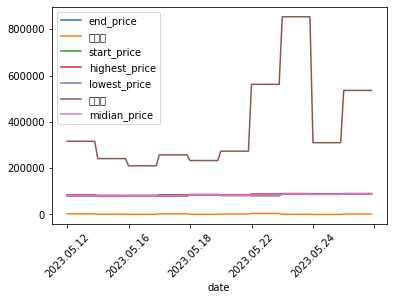

In [32]:
all_tables[:100].plot.line(rot=45)

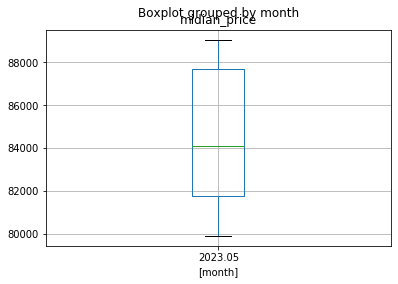

In [33]:
all_tables[:100].boxplot(column=['midian_price'], by=['month'])

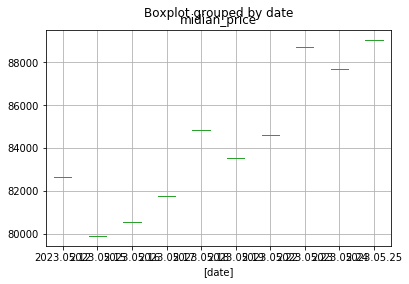

In [34]:
all_tables[:365].boxplot(column=['midian_price'], by=['date'])